In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv("train.csv")

In [49]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
df.isnull().sum().head(20)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
dtype: int64

In [51]:
df["Alley"]=df["Alley"].replace(np.NaN,'NA')

In [52]:
df["Alley"].value_counts()

NA      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [53]:
df["LotFrontage"]=df["LotFrontage"].apply(lambda x:1 if x>0 else 0)

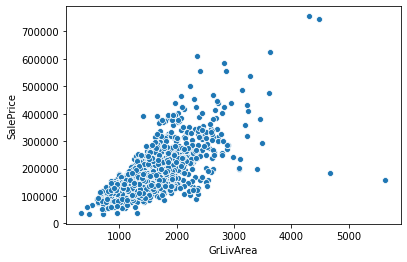

In [54]:
sns.scatterplot(x="GrLivArea",y='SalePrice',data=df)
plt.show()

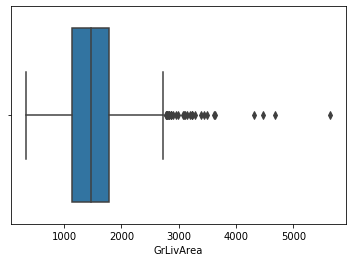

In [55]:
sns.boxplot(df["GrLivArea"])

In [56]:
df["GrLivArea"].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [57]:
Q1=df["GrLivArea"].quantile(0.25)
Q3=df["GrLivArea"].quantile(0.75)
IQR=Q3-Q1
df=df[~((df["GrLivArea"]<(Q1-1.5*IQR))| (df["GrLivArea"]>(Q3+1.5*IQR)))]

In [58]:
df["GrLivArea"].describe()

count    1429.000000
mean     1476.751575
std       449.928056
min       334.000000
25%      1125.000000
50%      1452.000000
75%      1746.000000
max      2730.000000
Name: GrLivArea, dtype: float64

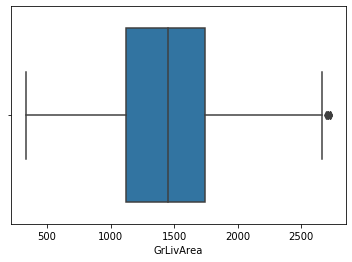

In [60]:
sns.boxplot(df["GrLivArea"])

In [61]:
df=df[df["LotArea"]<=17315]

C:\Users\vikhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


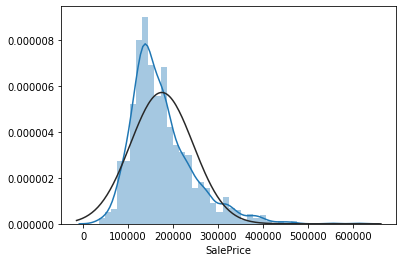

In [63]:
from scipy import stats
from scipy.stats import norm
sns.distplot(df["SalePrice"],fit=norm)

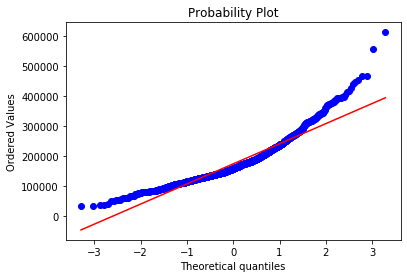

In [64]:
res=stats.probplot(df["SalePrice"],plot=plt)

In [65]:
df["SalePrice"].skew()

1.3508762106376777

In [66]:
df["LSalePrice"]=np.log(df["SalePrice"])

In [67]:
df["LSalePrice"].skew()

-0.04000045261761786

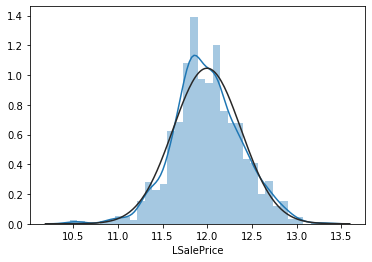

In [69]:
from scipy import stats
from scipy.stats import norm
sns.distplot(df["LSalePrice"],fit=norm)

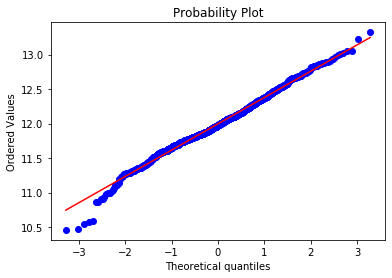

In [70]:
res=stats.probplot(df["LSalePrice"],plot=plt)

In [75]:
n1=df.isnull().sum()
print(n1[n1>0])

MasVnrType         7
MasVnrArea         7
BsmtQual          36
BsmtCond          36
BsmtExposure      37
BsmtFinType1      36
BsmtFinType2      37
Electrical         1
FireplaceQu      679
GarageType        79
GarageYrBlt       79
GarageFinish      79
GarageQual        79
GarageCond        79
PoolQC          1362
Fence           1096
MiscFeature     1316
dtype: int64


### create numerical and categorical variables

In [77]:
numcols=list(df.select_dtypes(exclude=(['object'])).columns)
numcols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'LSalePrice']

In [79]:
df[numcols]=df[numcols].fillna(0)

In [80]:
charcol=list(df.select_dtypes(include=(['object'])).columns)
charcol

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [82]:
df[charcol]=df[charcol].fillna('NA')

In [83]:
n1=df.isnull().sum()
print(n1[n1>0])

Series([], dtype: int64)


In [85]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[charcol]=df[charcol].apply(le.fit_transform)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 0 to 1459
Data columns (total 82 columns):
Id               1364 non-null int64
MSSubClass       1364 non-null int64
MSZoning         1364 non-null int32
LotFrontage      1364 non-null int64
LotArea          1364 non-null int64
Street           1364 non-null int32
Alley            1364 non-null int32
LotShape         1364 non-null int32
LandContour      1364 non-null int32
Utilities        1364 non-null int32
LotConfig        1364 non-null int32
LandSlope        1364 non-null int32
Neighborhood     1364 non-null int32
Condition1       1364 non-null int32
Condition2       1364 non-null int32
BldgType         1364 non-null int32
HouseStyle       1364 non-null int32
OverallQual      1364 non-null int64
OverallCond      1364 non-null int64
YearBuilt        1364 non-null int64
YearRemodAdd     1364 non-null int64
RoofStyle        1364 non-null int32
RoofMatl         1364 non-null int32
Exterior1st      1364 non-null int32
Exter

In [87]:
y=df['SalePrice']
X=df.drop('SalePrice',axis=1)

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [94]:
print('Shape of X_train:',X_train.shape,'\n','Shape of X_test:',X_test.shape)

Shape of X_train: (954, 81) 
 Shape of X_test: (410, 81)
